In [1]:
from keras.models import load_model
import tensorflow as tf
import os
import os.path as osp
from keras import backend as K

K.clear_session()
sess = tf.Session()
K.set_session(sess)

Using TensorFlow backend.


In [2]:
from tensorflow.core.framework import graph_pb2
with open('../data/dog_breed_graph_v2.pb', "rb") as f:
    output_graph_def = graph_pb2.GraphDef()
    output_graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(output_graph_def, name="")

In [3]:
x = sess.graph.get_tensor_by_name('input_3:0')

In [4]:
y = sess.graph.get_tensor_by_name('softmax0:0')

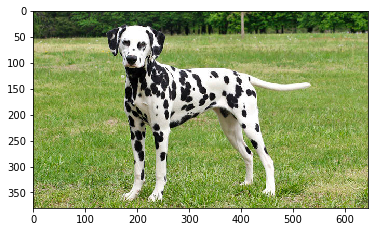

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

img = plt.imread('dalmatian.png')
plt.imshow(img)

In [6]:
def preprocess_input(x):
    x_copy = np.copy(x)
    x_copy -= 0.5
    x_copy *= 2.
    return x_copy

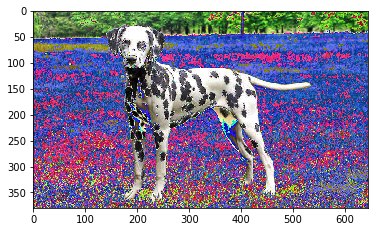

In [7]:
img_processed = preprocess_input(img)
plt.imshow(img_processed)

In [8]:
imgs = np.expand_dims(img_processed, 0)

In [9]:
new_scores = sess.run(y, feed_dict={x: imgs})

In [10]:
# Dalmatian is 56
print(np.argmax(new_scores))

56
